# Project 4: Predict Dengue Cases

**Notebook 3.2 - Contents:**<br>
[Function for Model Evaluation](#Function-for-Model-Evaluation)<br>
[Function for Visualisation](#Function-for-Visualisation)<br>
[Feature Selection](#Feature-Selection)<br>
[Train Test Split](#Train-Test-Split)<br>
[Linear Regression](#Linear-Regression)<br>
[Decision Tree](#Decision-Tree)<br>
[Random Tree](#Random-Forest)<br>
[Support Vector Regression](#Support-Vector-Regression)<br>
[Summary of Model Performance](#Summary-of-Model-Performance)

**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
import compiled_functions

**Load pickled dataframes**

In [3]:
#load pickled df
dengue_lagged_12 = pickle.load(open('../pkls/dengue_lagged_12.pkl', 'rb'))

In [4]:
# Check dataframe dimension
dengue_lagged_12

,df,dhf,dengue_cases,daily_rainf_total,highest_30min_rainf,highest_60min_rainf,highest_120min_rainf,mean_temp,max_temp,min_temp,mean_wind_speed,max_wind_speed,dengue_searches,dengue_fever_searches,dengue_symptoms_searches,daily_rainf_total_squared,highest_30min_rainf_squared,highest_60min_rainf_squared,highest_120min_rainf_squared
2012-04-15,77.0000,0.0000,77.0000,0.6000,0.6000,0.6000,0.6000,27.2000,31.4000,25.2000,8.4000,28.4000,6.0000,7.0000,3.0000,0.3600,0.3600,0.3600,0.3600
2012-04-22,64.0000,0.0000,64.0000,4.0000,1.4683,1.4683,1.7766,26.9714,30.5429,24.7857,12.2143,34.6000,6.0000,3.0000,0.0000,16.0000,2.1559,2.1559,3.1563
2012-04-29,86.0000,2.0000,88.0000,3.6857,0.8083,1.1583,1.7547,26.2286,29.5000,23.8286,7.8143,34.2143,6.0000,3.0000,2.0000,13.5845,0.6534,1.3417,3.0791
2012-05-06,96.0000,1.0000,97.0000,4.0000,2.7015,3.2066,3.2252,26.9143,31.3000,24.4714,7.3571,28.0429,7.0000,4.0000,1.0000,16.0000,7.2979,10.2823,10.4018
2012-05-13,80.0000,0.0000,80.0000,1.2286,0.8720,0.9167,0.9625,26.6000,30.6000,24.4000,8.5857,30.8571,8.0000,4.0000,1.0000,1.5094,0.7604,0.8403,0.9264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,242.0000,0.0000,242.0000,4.6286,3.8286,4.6000,4.6286,29.2571,32.4143,26.8429,11.0429,35.1714,44.0000,10.0000,13.0000,21.4237,14.6580,21.1600,21.4237
2022-12-04,326.0000,1.0000,327.0000,4.2000,3.1143,3.4571,3.5714,28.3857,31.4429,26.0429,9.3143,36.7571,40.0000,8.0000,12.0000,17.6400,9.6988,11.9518,12.7551
2022-12-11,289.0000,1.0000,290.0000,7.8000,3.2857,3.9714,5.2857,27.3571,30.5857,24.7714,7.5429,31.7571,40.0000,6.0000,8.0000,60.8400,10.7959,15.7722,27.9388
2022-12-18,270.0000,0.0000,270.0000,1.5429,1.0000,1.1429,1.2571,27.8286,30.7857,25.8429,6.6714,31.7429,38.0000,5.0000,10.0000,2.3804,1.0000,1.3061,1.5804


In [5]:
# Check data summary of statistics
dengue_lagged_12.describe().T

,count,mean,std,min,25%,50%,75%,max
df,559.0000,291.3551,297.3676,24.0000,85.0000,213.0000,374.0000,1791.0000
dhf,559.0000,0.7424,1.0879,0.0000,0.0000,0.0000,1.0000,8.0000
dengue_cases,559.0000,292.0975,297.7628,24.0000,85.5000,214.0000,375.5000,1792.0000
daily_rainf_total,559.0000,5.3132,5.8752,0.0000,1.1143,3.9714,6.9857,50.5429
highest_30min_rainf,559.0000,2.7301,2.6484,0.0000,0.7143,2.0857,3.8857,15.8571
highest_60min_rainf,559.0000,3.4162,3.3803,0.0000,0.8571,2.6857,4.6857,18.6857
highest_120min_rainf,559.0000,3.9557,3.9615,0.0000,0.9859,3.0000,5.3143,22.5143
mean_temp,559.0000,27.9837,0.8704,24.5000,27.4286,28.0000,28.5429,30.0286
max_temp,559.0000,31.6435,1.0049,26.7000,31.1000,31.6714,32.3000,33.9429
min_temp,559.0000,25.4037,0.8773,22.7857,24.7714,25.3571,25.9357,27.8143


## Function for Model Evaluation

In [6]:
def evaluate_model(model, model_name, y_train, y_test, X_train, X_test):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = round(mse_train ** 0.5)
    rmse_test = round(mse_test ** 0.5)
    print(f'{model_name}'.center(30,'='))
    print('Train RMSE is: ' + str(rmse_train))
    print('Test RMSE is: ' + str(rmse_test))
    
    mape_train = round(mean_absolute_percentage_error(y_train, y_pred = model.predict(X_train)),4)
    mape_test = round(mean_absolute_percentage_error(y_test, y_pred = model.predict(X_test)),4)
    print('Train MAPE is: ' + str(mape_train))
    print('Test MAPE is: ' + str(mape_test))

## Function for Visualisation

In [7]:
def plot_forecast(y_train, y_test, model, plot_title, X_train, X_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(15,8))
    plt.plot(y_train, color='blue', label='y_train')
    plt.plot(y_test, color='orange', label='y_test', alpha = 0.7)
    plt.plot(X_train.index, y_pred_train, color='green', alpha = 0.9, ls = '--')
    plt.plot(X_test.index, y_pred_test, color='green', label='y_pred', alpha = 0.9, ls = '--')
    plt.ylabel('No. of Dengue Cases')
    
    mape =  mean_absolute_percentage_error(y_test,y_pred_test)
    plt.title(label = f'{plot_title}\n MAPE: {mape:.4f}', fontsize=12)
    plt.legend(fontsize = 9, loc = 'upper left'); 

## Feature Selection

1. We split the dengue datasets into 2012-2021 as training data, and remaining 52 weeks in year 2022 as testing data.  Then we will use trained model to predict 2022 dengue cases and compare against our testing data.
2. Dengue features: 'dengue_fever (df)' and 'dengue haemorrhagic fever (dhf)' are the feature-engineered variable of DF and DHF, hence they are dropped.
3. Google searches: 'dengue_fever_searches' and 'dengue_symptoms_searches' are dropped as these two have multicollonearity issue with 'dengue_searches'.
4. Weather features: 'highest_30min_rainf', 'highest_60min_rainf' and 'highest_120min_rainf' are dropped as these 3 features are multicollinear to the 'daily_rainf_total' feature.

In [8]:
features_to_drop = ['dengue_cases','df','dhf',
                    'dengue_fever_searches','dengue_symptoms_searches', 'min_temp',
                    'highest_30min_rainf', 'highest_60min_rainf','highest_120min_rainf',
                    'highest_30min_rainf_squared', 'highest_60min_rainf_squared','highest_120min_rainf_squared']

In [9]:
X_qtr = dengue_lagged_12.drop(features_to_drop,axis=1)  
y_qtr = dengue_lagged_12['dengue_cases']

## Train Test Split

#### Jan to Mar 2022

We would start forecast for 12 weeks into 2022.  With this, we split datasets into 507 weeks for training and next 13 weeks for testing to assess if the prediction model works as expected through RMSE and MAPE. 

In [10]:
X_train, X_test, y_train, y_test = X_qtr[:-52], X_qtr[-52:-39], y_qtr[:-52], y_qtr[-52:-39]

In [11]:
print('X_train dataframe rows, columns: ', X_train.shape)
print('y_train rows: ', y_train.shape)
print('X_test dataframe rows, columns: ', X_test.shape)
print('y_test rows: ', y_test.shape)

X_train dataframe rows, columns:  (507, 7)
y_train rows:  (507,)
X_test dataframe rows, columns:  (13, 7)
y_test rows:  (13,)


In [44]:
# Check if split correctly.
X_train

,daily_rainf_total,mean_temp,max_temp,mean_wind_speed,max_wind_speed,dengue_searches,daily_rainf_total_squared
2012-04-15,0.6000,27.2000,31.4000,8.4000,28.4000,6.0000,0.3600
2012-04-22,4.0000,26.9714,30.5429,12.2143,34.6000,6.0000,16.0000
2012-04-29,3.6857,26.2286,29.5000,7.8143,34.2143,6.0000,13.5845
2012-05-06,4.0000,26.9143,31.3000,7.3571,28.0429,7.0000,16.0000
2012-05-13,1.2286,26.6000,30.6000,8.5857,30.8571,8.0000,1.5094
...,...,...,...,...,...,...,...
2021-11-28,4.0571,28.3714,31.8143,8.0857,41.5143,11.0000,16.4604
2021-12-05,17.8857,26.8571,30.1286,6.7000,31.5000,12.0000,319.8988
2021-12-12,7.1429,27.1429,30.3000,8.6714,34.9143,10.0000,51.0204
2021-12-19,18.2286,27.4429,30.8429,8.4286,35.1714,11.0000,332.2808


## Linear Regression

We started with Linear Regression model for its simplicity and adaptability.

### Modelling

In [13]:
# Create the pipeline
pipe_lr = Pipeline([('ss', StandardScaler()),
                    ('lr', LinearRegression())])

In [14]:
# Fit the model
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

### Model Evaluation

In [15]:
evaluate_model(pipe_lr, 'Linear Regression', y_train, y_test, X_train, X_test)

======Linear Regression=======
Train RMSE is: 225
Test RMSE is: 162
Train MAPE is: 1.03
Test MAPE is: 0.3524


1. Our test RMSE is lower than the train RMSE, indicating that our linear regression model performs well on test set.  This suggests this model is not overfitting.
2. Test MAPE 35% suggests model prediction is relatively close to actual values, as compared to train MAPE 103%.
3. Considering this Linear model has already taken into account feature selection, we would attempt tree-based regression algorithms (Decision Tree and Random Forest) and Support Vector Machines to see if better models can be produced.


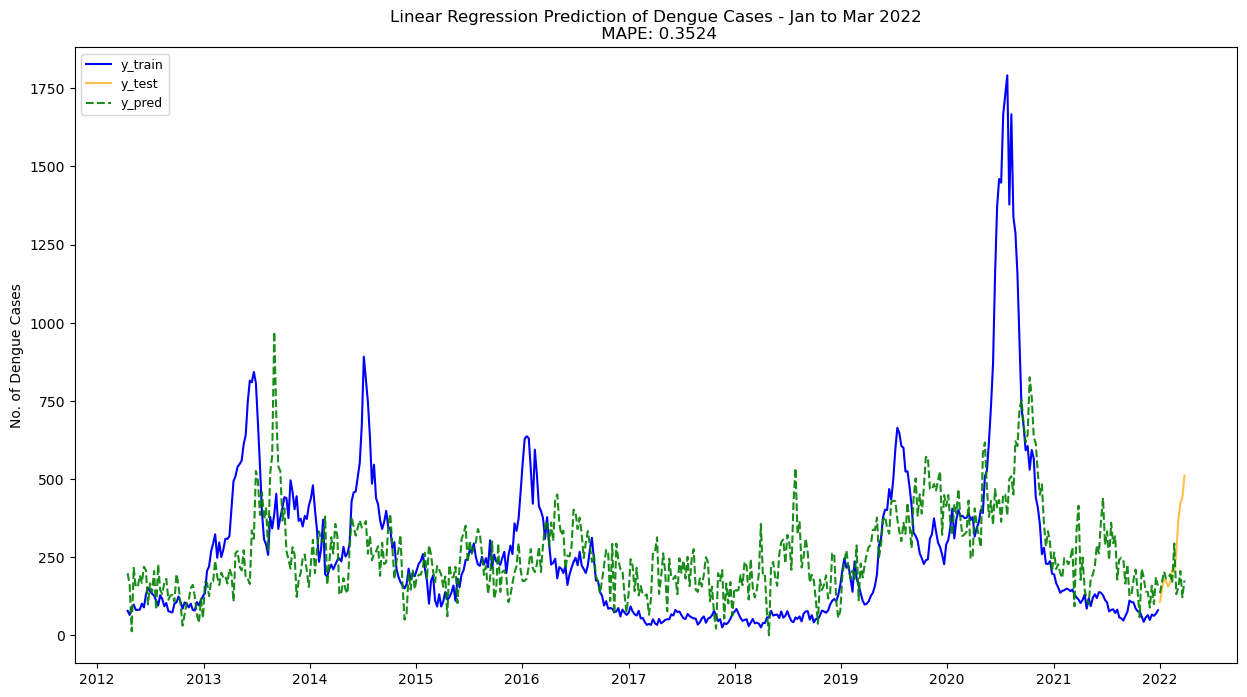

In [16]:
# Plot the y_train and y_test
plot_forecast(y_train, y_test, pipe_lr, 'Linear Regression Prediction of Dengue Cases - Jan to Mar 2022', X_train, X_test)
# Save the plot as a PNG file
plot_filename = "LINEAR_REGRESSION.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight', transparent=True)  # dpi controls resolution
 
plt.show()

Among the 4 models, Linear Regression seems to predict some historic uptrends correctly. For Q1 2022, it managed to predict the uptrend but it went downward thereafter while the actual trend spiked. 

In [17]:
# Coefficients review
pd.DataFrame(pipe_lr.named_steps['lr'].coef_, X_test.columns, columns=['Coefficients']).sort_values(by='Coefficients', ascending=False)

,Coefficients
dengue_searches,113.6342
max_temp,103.1437
mean_wind_speed,50.6156
daily_rainf_total,36.0434
daily_rainf_total_squared,-11.3681
max_wind_speed,-34.0679
mean_temp,-54.8301


Coefficients study aligned with findings in EDA Notebook 2.  Dengue searches on Google and Maximum Temperature have positive linear relationship with dengue cases.

## Decision Tree

1. Decision Tree is used for dengue prediction because it is capable of handling noise or irrelevant variables, its results are interpretable and short runtime.
2. Each data point runs through the entire tree until it reaches the leaf node. Through multiple iterations, the Tree algorithm maximize information gain in order to predict the optimal mean.
3. Non-linear datasets could also be modeled (unlike Linear Regression), as we could tune the hyper-parameters to improve model's predictive capability.

### Modelling

In [18]:
pipe_dt = Pipeline([('ss', StandardScaler()),
                    ('dt', DecisionTreeRegressor())])

In [19]:
pipe_dt_params = {'dt__max_depth':[5, 8, 10],
                  'dt__min_samples_split':[2, 3, 4, 5],
                  'dt__min_samples_leaf':[1, 2, 3, 5],
                  'dt__ccp_alpha': [0, 0.01, 0.1, 1, 10],
                  'dt__random_state':[42]}  # random state is set to ensure consistency in results for reproducibility.

In [20]:
gs_dt = GridSearchCV(pipe_dt,
                     param_grid=pipe_dt_params,
                     cv=3)

In [21]:
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('dt', DecisionTreeRegressor())]),
             param_grid={'dt__ccp_alpha': [0, 0.01, 0.1, 1, 10],
                         'dt__max_depth': [5, 8, 10],
                         'dt__min_samples_leaf': [1, 2, 3, 5],
                         'dt__min_samples_split': [2, 3, 4, 5],
                         'dt__random_state': [42]})

In [22]:
rf_result = pd.DataFrame(gs_dt.cv_results_).sort_values('rank_test_score',ascending=False)
rf_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__ccp_alpha,param_dt__max_depth,param_dt__min_samples_leaf,param_dt__min_samples_split,param_dt__random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
92,0.0452,0.0495,0.0000,0.0000,0.0100,10,5,2,42,"{'dt__ccp_alpha': 0.01, 'dt__max_depth': 10, '...",-0.8172,-4.9292,0.0751,-1.8904,2.1794,229
44,0.0087,0.0009,0.0055,0.0039,0,10,5,2,42,"{'dt__ccp_alpha': 0, 'dt__max_depth': 10, 'dt_...",-0.8172,-4.9292,0.0751,-1.8904,2.1794,229
45,0.0077,0.0015,0.0027,0.0038,0,10,5,3,42,"{'dt__ccp_alpha': 0, 'dt__max_depth': 10, 'dt_...",-0.8172,-4.9292,0.0751,-1.8904,2.1794,229
46,0.0081,0.0013,0.0027,0.0038,0,10,5,4,42,"{'dt__ccp_alpha': 0, 'dt__max_depth': 10, 'dt_...",-0.8172,-4.9292,0.0751,-1.8904,2.1794,229
47,0.0080,0.0016,0.0053,0.0038,0,10,5,5,42,"{'dt__ccp_alpha': 0, 'dt__max_depth': 10, 'dt_...",-0.8172,-4.9292,0.0751,-1.8904,2.1794,229


### Model Evaluation

In [23]:
evaluate_model(gs_dt,'Decision Tree', y_train, y_test, X_train, X_test)

========Decision Tree=========
Train RMSE is: 166
Test RMSE is: 194
Train MAPE is: 0.7438
Test MAPE is: 0.455



1. Decision Tree model might be overfit as reflected in lower train RMSE than test RMSE. But the train and test RMSE are close to each other, indicating that model is not heavily overfitting.
2. Test MAPE 45% suggests prediction deviates from actuals by 45% which is worse than Linear Regression. 
3. As observed, Decision Tree overfits even we limit the max depth through hyperparameter tuning (GridSearch).
4. Decision Tree is relatively simple tree-based model, with this we explore more advanced model i.e. Random Forest as our next step to see if it improve predictive performance. 


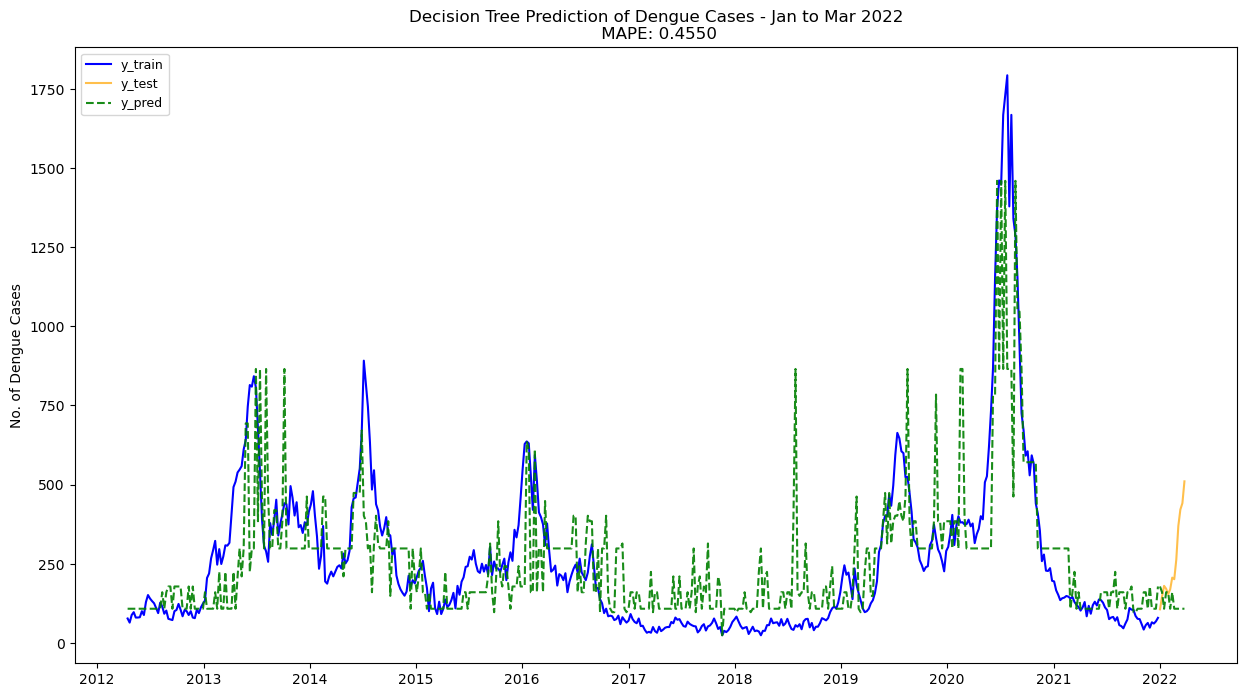

In [24]:
plot_forecast(y_train, y_test, gs_dt, "Decision Tree Prediction of Dengue Cases - Jan to Mar 2022", X_train, X_test)

# Save the plot as a PNG file
plot_filename = "DECISION_TREE.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight', transparent=True)  # dpi controls resolution
 
plt.show()

Decision Tree model did not manage to forecast the uptrend in Jan to Mar 2022 per above graph.  

## Random Forest

1. We consider Random Forest model for dengue prediction because it can handle complex and non-linearity between weather variables.  We could add in variables into the model if it arises in future.
2. Random forest is an ensemble of tree-based algorithms to train individual tree to give prediction and take the average as the model's prediction. The randomness makes each prediction different hence more robust and less prone to overfitting as Decision Tree does.
3. Random Forest provides feature importance for us to determine the main driver of dengue cases.
4. 'Random State' is set during hyperparameter tuning to control the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node, as we want consistence in the result of the dataset every time.

### Modelling

In [25]:
pipe_rf = Pipeline([('ss', StandardScaler()),
                    ('rf', RandomForestRegressor())])

In [26]:
pipe_rf_params = {'rf__max_depth': [5, 10, 20, 30],
                  'rf__n_estimators':[5, 10, 20],
                  'rf__min_samples_split':[2, 4, 6, 7],
                  'rf__min_samples_leaf':[1, 2, 5],
                  'rf__random_state': [42]}

In [27]:
gs_rf  = GridSearchCV(pipe_rf,
                      param_grid=pipe_rf_params,
                      cv=3)

In [28]:
gs_rf = gs_rf.fit(X_train, y_train)

In [29]:
rf_result = pd.DataFrame(gs_rf.cv_results_).sort_values('rank_test_score',ascending=False)
rf_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_leaf,param_rf__min_samples_split,param_rf__n_estimators,param_rf__random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
117,0.0245,0.0001,0.0050,0.0036,30,1,7,5,42,"{'rf__max_depth': 30, 'rf__min_samples_leaf': ...",-0.7795,-3.7143,0.0244,-1.4898,1.6068,143
81,0.0243,0.0006,0.0061,0.0035,20,1,7,5,42,"{'rf__max_depth': 20, 'rf__min_samples_leaf': ...",-0.7795,-3.7143,0.0244,-1.4898,1.6068,143
78,0.0240,0.0006,0.0027,0.0038,20,1,6,5,42,"{'rf__max_depth': 20, 'rf__min_samples_leaf': ...",-0.8080,-3.6383,0.0243,-1.4740,1.5677,141
114,0.0270,0.0040,0.0050,0.0036,30,1,6,5,42,"{'rf__max_depth': 30, 'rf__min_samples_leaf': ...",-0.8080,-3.6383,0.0243,-1.4740,1.5677,141
111,0.0269,0.0038,0.0028,0.0039,30,1,4,5,42,"{'rf__max_depth': 30, 'rf__min_samples_leaf': ...",-0.8365,-3.5894,0.0044,-1.4738,1.5348,140


### Model Evaluation

In [30]:
evaluate_model(gs_rf, 'Random Forest', y_train, y_test, X_train, X_test)

========Random Forest=========
Train RMSE is: 178
Test RMSE is: 188
Train MAPE is: 0.7826
Test MAPE is: 0.4853


1. Train and test RMSE are close to each other, indicates Random Forest model is performing well and not overfitting.
2. Lower MAPE on test set than train set suggests prediction is relatively close to actual values.  But the MAPE 49% is higher than Decision Tree and Linear Regression which are not ideal.
3. Deep-dive into features importance scoring would help identify main driver of dengue cases to further improve model's performance. 

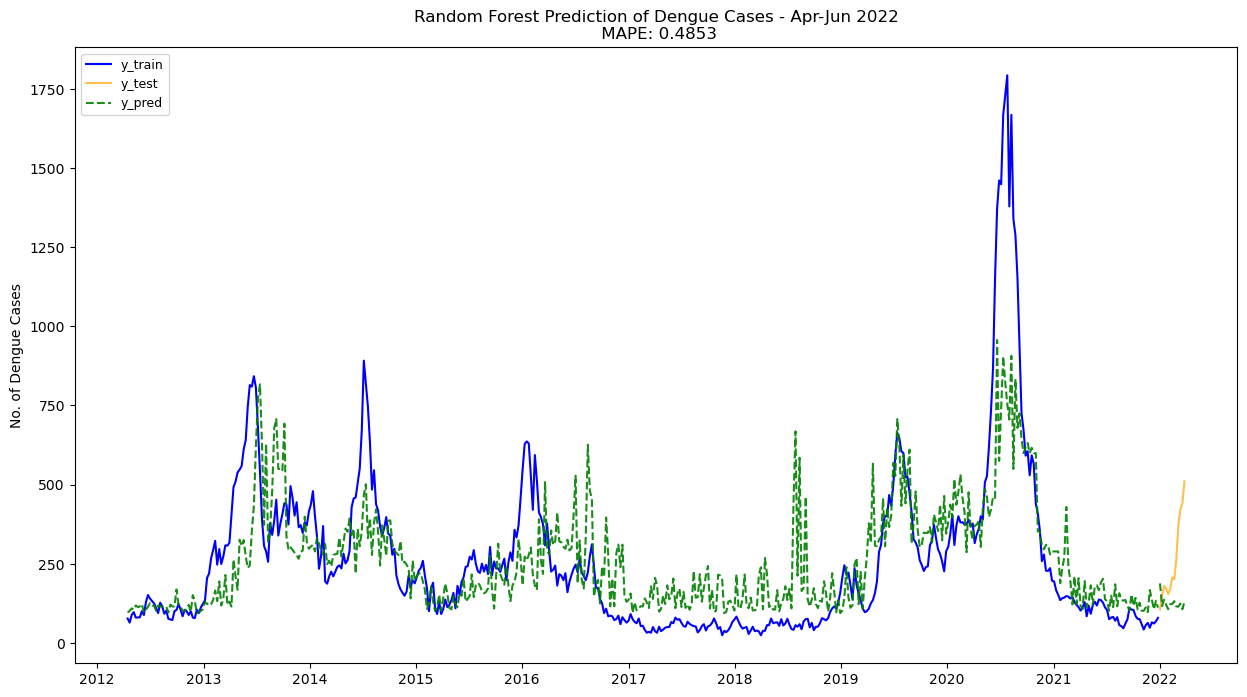

In [31]:
plot_forecast(y_train, y_test, gs_rf, "Random Forest Prediction of Dengue Cases - Apr-Jun 2022", X_train, X_test=X_test)

# Save the plot as a PNG file
plot_filename = "RANDOM_FOREST.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight', transparent=True)  # dpi controls resolution
 
plt.show()

Random Forest did not manage to predict the upward trend in Jan to Mar 2022 per above graph.  

### Feature Importance

In [32]:
# Extract the model's feature importances based on Gini impurity
feature_importances = gs_rf.best_estimator_.named_steps['rf'].feature_importances_

# Getting the feature names 
feature_names = gs_rf.best_estimator_.named_steps['ss'].get_feature_names_out()

# display the feature importances
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
fi_df.sort_values(by='importance', ascending=False, inplace=True)
fi_df

,feature,importance
5,dengue_searches,0.5251
2,max_temp,0.1722
4,max_wind_speed,0.0875
1,mean_temp,0.0775
6,daily_rainf_total_squared,0.0578
3,mean_wind_speed,0.0508
0,daily_rainf_total,0.0291


Feature Importance (this pretty much conincide with findings in Linear Regression's coefficients):
1. Dengue searches on Google is the most important feature in relation to dengue cases.
2. General public utilize Internet to gather more information on the disease hence leveraging on the Internet data sources could be an effective way to complement dengue tracking initiative, as the Google searches has been shown strong correlation with dengue.
3. Max temperature has shown relatively strong relationship with dengue cases as it leads to precipitation and rainfalls that contribute to increased dengue breeding spots. 

## Support Vector Regression

1. Support Vector Regression (SVR) models is effective in solving non-linear relationships between variables.
2. SVR provides flexibility to adjust the model's robustness by tuning hyperparameters, hence we consider SVR in dengue prediction in view of the unpredictability of weather features and dengue disease.
3. It uses a subset of training points in the decision function (aka support vectors), hence more memory efficient to take into account the model's training time.

### Modelling

In [33]:
pipe_svr = Pipeline([('ss', StandardScaler()),
                    ('svr', SVR())])

In [34]:
pipe_svr_params = {'svr__kernel': ['linear'], 
                   'svr__C': [0.001, 0.1, 1.0],  # squared L2 penalty
                   'svr__degree': [3, 5, 8, 10],
                   'svr__epsilon': [0.01, 0.1],
                   'svr__max_iter': [10000, 20000],
                   'svr__gamma': [0.1,1]}

In [35]:
gs_svr = GridSearchCV(pipe_svr,
                      param_grid=pipe_svr_params,
                      cv=3)

In [36]:
gs_svr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.001, 0.1, 1.0],
                         'svr__degree': [3, 5, 8, 10],
                         'svr__epsilon': [0.01, 0.1], 'svr__gamma': [0.1, 1],
                         'svr__kernel': ['linear'],
                         'svr__max_iter': [10000, 20000]})

In [37]:
rf_result = pd.DataFrame(gs_svr.cv_results_).sort_values('rank_test_score',ascending=False)
rf_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__degree,param_svr__epsilon,param_svr__gamma,param_svr__kernel,param_svr__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0131,0.0034,0.0033,0.0046,0.0010,3,0.0100,0.1000,linear,10000,"{'svr__C': 0.001, 'svr__degree': 3, 'svr__epsi...",-0.6282,-0.4256,-0.1953,-0.4164,0.1768,65
17,0.0103,0.0032,0.0082,0.0001,0.0010,8,0.0100,0.1000,linear,20000,"{'svr__C': 0.001, 'svr__degree': 8, 'svr__epsi...",-0.6282,-0.4256,-0.1953,-0.4164,0.1768,65
1,0.0082,0.0002,0.0000,0.0000,0.0010,3,0.0100,0.1000,linear,20000,"{'svr__C': 0.001, 'svr__degree': 3, 'svr__epsi...",-0.6282,-0.4256,-0.1953,-0.4164,0.1768,65
31,0.0081,0.0001,0.0080,0.0000,0.0010,10,0.1000,1,linear,20000,"{'svr__C': 0.001, 'svr__degree': 10, 'svr__eps...",-0.6282,-0.4256,-0.1953,-0.4164,0.1768,65
30,0.0075,0.0010,0.0085,0.0007,0.0010,10,0.1000,1,linear,10000,"{'svr__C': 0.001, 'svr__degree': 10, 'svr__eps...",-0.6282,-0.4256,-0.1953,-0.4164,0.1768,65


### Model Evaluation

In [38]:
evaluate_model(gs_svr, 'SVR', y_train, y_test, X_train, X_test)

=============SVR==============
Train RMSE is: 243
Test RMSE is: 184
Train MAPE is: 0.7284
Test MAPE is: 0.4231


1. Lower test RMSE than train RMSE suggests SVR model generalize well with unseen data.
2. Test MAPE 42% indicates model's prediction are 58% close to actual values.

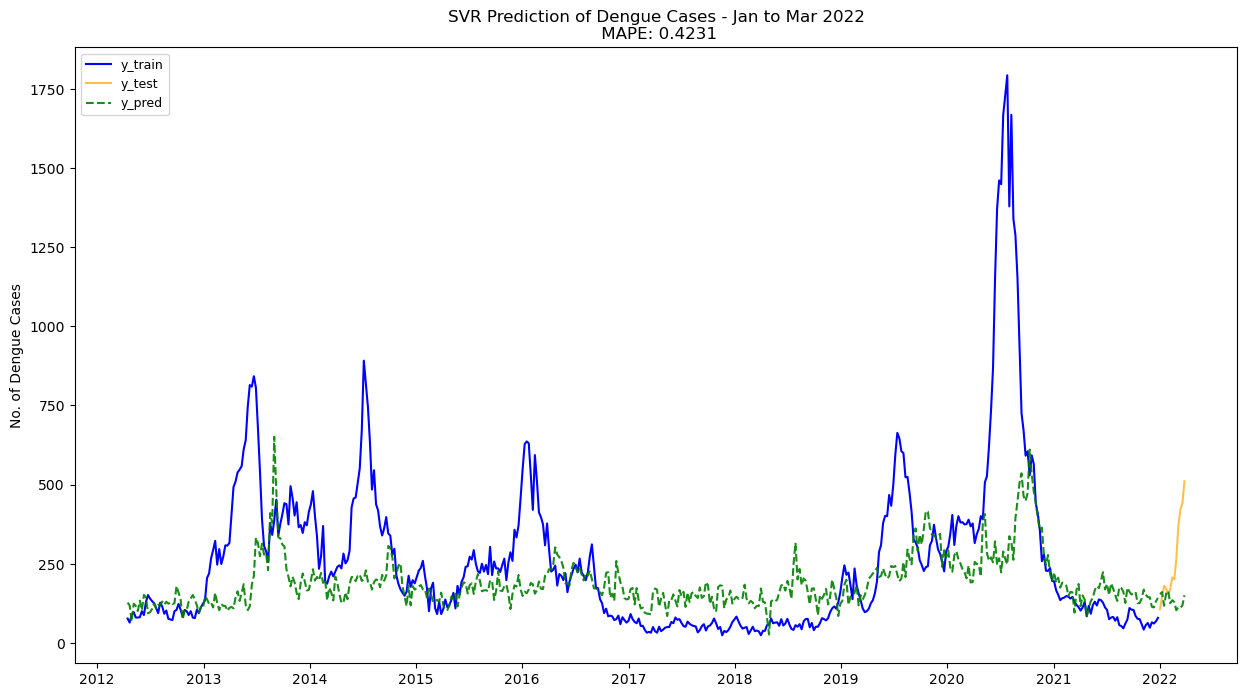

In [39]:
plot_forecast(y_train, y_test, gs_svr, "SVR Prediction of Dengue Cases - Jan to Mar 2022", X_train, X_test)

# Save the plot as a PNG file
plot_filename = "SVR.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight', transparent=True)  # dpi controls resolution
 
plt.show()

## Comparison of Regression Models

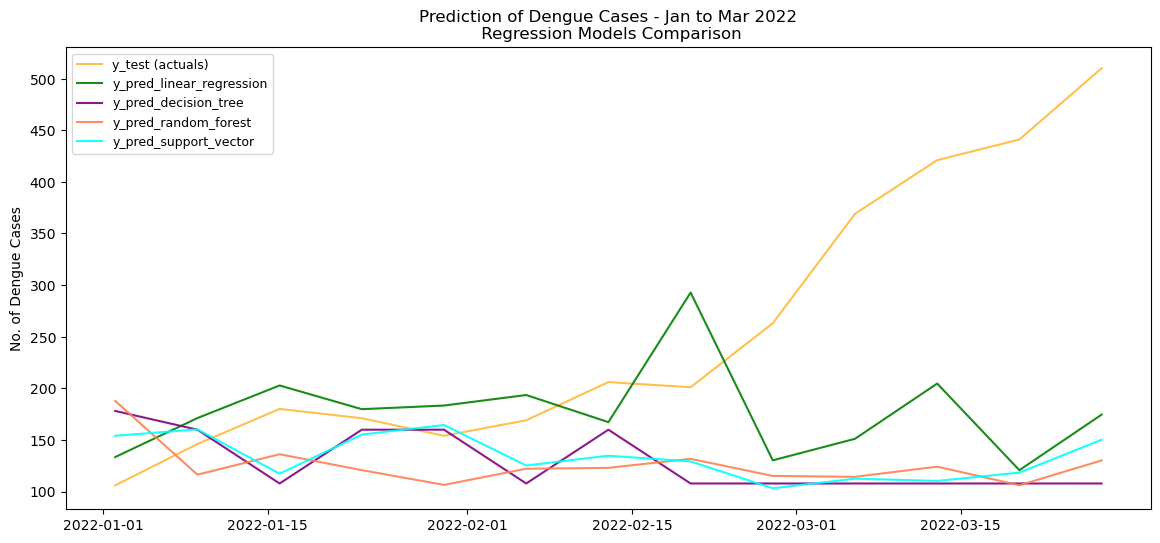

In [40]:
y_pred_lr = pipe_lr.predict(X_test)
y_pred_dt = gs_dt.predict(X_test)
y_pred_rf = gs_rf.predict(X_test)
y_pred_svr = gs_svr.predict(X_test)
plt.figure(figsize=(14,6))
plt.plot(y_test, color='orange', label='y_test (actuals)', alpha = 0.7)
plt.plot(X_test.index, y_pred_lr, color='green', label='y_pred_linear_regression', alpha = 0.9)
plt.plot(X_test.index, y_pred_dt, color='purple', label='y_pred_decision_tree', alpha = 0.9)
plt.plot(X_test.index, y_pred_rf, color='coral', label='y_pred_random_forest', alpha = 0.9)
plt.plot(X_test.index, y_pred_svr, color='aqua', label='y_pred_support_vector', alpha = 0.9)
plt.ylabel('No. of Dengue Cases')
plt.title(label = f'Prediction of Dengue Cases - Jan to Mar 2022\n Regression Models Comparison', fontsize=12)
plt.legend(fontsize = 9, loc = 'upper left'); 

# Save the plot as a PNG file
plot_filename = "COMBINED.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight', transparent=True)  # dpi controls resolution
 
plt.show()

As observed on the graph, Linear Regression managed to predict the uptrend in Q1 2022.  Decision Tree seems to predict the upticks but the line went down subsequently.  Random Forest and SVR seems to totally miss the uptrend in Q1 2022. 

## Summary of Model Performance

Based on analysis and comparison of the 6 models, SARIMAX yields the lowest RMSE and MAPE on test data hence it is our best model.  All regression models performed relatively well on test data with low RMSE, with Linear Regression has the lowest MAPE on test data among the regression model. 


| Models                      | RMSE                     |  MAPE                         |  Review                          |
|-----------------------------|--------------------------|-------------------------------|----------------------------------|
| SARIMA                      | Train: 268<br>Test: 533  | Train: 1.47 <br>Test: 0.43| Baseline model                   |    
| SARIMAX                     | Train: 269<br>Test: 133  | Train: 1.39<br>Test: 0.31  | Lowest test RMSE and test MAPE.  **Best Model**   |
| Linear Regression           | Train: 225<br>Test: 162  | Train: 1.03<br>Test: 0.35  | Lowest test MAPE among regression models |    
| Decision Tree               | Train: 166<br>Test: 194  | Train: 0.74<br>Test: 0.46  | Overfitting |   
| Random Forest               | Train: 178<br>Test: 188  | Train: 0.78<br>Test: 0.49 | Overfitting. Did not manage to predict uptrend |
| Support Vector Regressor | Train: 243<br>Test: 184 | Train: 0.73<br>Test: 0.42 | Overfitting. Did not manage to predict uptrend  |